**30E03000 - Data Science for Business I (2021)**

# Assignment 2: Credit Risk Modeling

## Import libraries

In [2]:
import pandas as pd
import pandas as pd 
import itertools

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks

#sklearn for modeling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm
from sklearn.model_selection import train_test_split #Data split function
from sklearn.preprocessing import LabelEncoder #OneHotEncoding
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

#Decision tree plot
import pydotplus
from IPython.display import Image
from collections import Counter

Using TensorFlow backend.


## Import data

In [3]:
data = pd.read_csv("credit.csv")
data.head()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIOTV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,0


## Data exploration

Shape (rows and columns) and info of the dataset

In [7]:
data.shape

(1000, 32)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
OBS#                1000 non-null int64
CHK_ACCT            1000 non-null int64
DURATION            1000 non-null int64
HISTORY             1000 non-null int64
NEW_CAR             1000 non-null int64
USED_CAR            1000 non-null int64
FURNITURE           1000 non-null int64
RADIOTV             1000 non-null int64
EDUCATION           1000 non-null int64
RETRAINING          1000 non-null int64
AMOUNT              1000 non-null int64
SAV_ACCT            1000 non-null int64
EMPLOYMENT          1000 non-null int64
INSTALL_RATE        1000 non-null int64
MALE_DIV            1000 non-null int64
MALE_SINGLE         1000 non-null int64
MALE_MAR_or_WID     1000 non-null int64
COAPPLICANT         1000 non-null int64
GUARANTOR           1000 non-null int64
PRESENT_RESIDENT    1000 non-null int64
REAL_ESTATE         1000 non-null int64
PROP_UNKN_NONE      1000 non-null int64
AGE           

In [8]:
data.describe().round() #basic statistics for all numeric variables

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIOTV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,500.0,2.0,21.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0
std,289.0,1.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
min,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
25%,251.0,0.0,12.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0
50%,500.0,1.0,18.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0
75%,750.0,3.0,24.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,42.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0
max,1000.0,3.0,72.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,...,75.0,1.0,1.0,1.0,4.0,3.0,2.0,1.0,1.0,1.0


In [10]:
data.corr().style #correlation

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIOTV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,COAPPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
OBS#,1,0.00585201,0.0307876,-0.0116907,0.0576925,0.00824545,-0.00384632,-0.0174826,-0.0250655,-0.0180662,0.0134879,0.00373011,-0.0200784,0.0100764,0.0085035,-0.00831066,0.0051897,0.0182298,-0.00419698,0.0236971,-0.0355438,-0.0152788,-0.0100958,-0.00414866,0.0254418,-0.0132442,0.0228384,-0.0273454,0.0266624,-0.00782904,-0.0181774,-0.0346064
CHK_ACCT,0.00585201,1,-0.0720131,0.192191,-0.0695588,0.0643035,-0.0980162,0.110632,0.0078479,0.0215875,-0.0427049,0.222867,0.106339,-0.00527986,-0.0505551,0.0524359,-0.0112411,-0.0507798,-0.114673,-0.0422337,0.035865,-0.0746238,0.0597511,-0.0435934,-0.0918969,0.129434,0.0760051,0.0406631,-0.0141454,0.0662958,-0.026758,0.350847
DURATION,0.0307876,-0.0720131,1,-0.0771865,-0.109999,0.144939,-0.0628037,-0.0443189,0.00374975,0.164113,0.624984,0.0476609,0.057381,0.0747488,0.00641454,0.121889,-0.0844181,0.0296981,-0.0395943,0.0340672,-0.242586,0.212838,-0.0361364,0.0676022,-0.0644171,-0.0751692,-0.0112836,0.21091,-0.0238345,0.164718,-0.138196,-0.214927
HISTORY,-0.0116907,0.192191,-0.0771865,1,0.04248,0.0390963,-0.0255391,0.0213958,0.0540386,-0.0900913,-0.0599055,0.0390579,0.138225,0.0443746,-0.00953623,0.0860077,-0.0260153,0.0077097,-0.0471789,0.063198,0.0457987,-0.0254123,0.147086,-0.12195,-0.10254,0.100905,0.437066,0.0103502,0.0115496,0.0523702,0.0138733,0.228785
NEW_CAR,0.0576925,-0.0695588,-0.109999,0.04248,1,-0.187291,-0.259831,-0.344672,-0.126799,-0.181149,-0.0407933,-0.00234818,-0.0212318,-0.045801,-0.0184238,0.0273743,-0.0124872,0.00483618,-0.0124255,0.019848,0.0420564,0.0259398,0.0750441,-0.027462,-0.0116204,-0.00961793,0.0358451,-0.088711,0.102663,-0.0362748,0.154436,-0.0969005
USED_CAR,0.00824545,0.0643035,0.144939,0.0390963,-0.187291,1,-0.159301,-0.211317,-0.0777402,-0.111062,0.252101,0.11288,0.039358,-0.0947971,-0.0324546,0.0896102,-0.0395665,-0.0534742,-0.0349104,0.107257,-0.131941,0.128863,0.0508579,-0.00979095,0.0391595,-0.141375,-0.005248,0.18073,0.0548616,0.136693,-0.0315638,0.0997908
FURNITURE,-0.00384632,-0.0980162,-0.0628037,-0.0255391,-0.259831,-0.159301,1,-0.293164,-0.10785,-0.154078,-0.0340366,-0.0822406,-0.080656,-0.0629788,0.070907,-0.0740424,-0.086736,0.0599775,-0.0282157,-0.00693367,-0.0521911,-0.0710504,-0.127657,-0.00444554,0.1057,-0.0404955,-0.070478,0.013422,-0.0865151,-0.0535867,-0.00959042,-0.0209706
RADIOTV,-0.0174826,0.110632,-0.0443189,0.0213958,-0.344672,-0.211317,-0.293164,1,-0.143066,-0.204388,-0.173203,-0.00197441,0.0728068,0.138552,-0.0715329,-0.0332942,0.125142,-0.00539132,0.114756,-0.0900428,0.123937,-0.117977,-0.0464014,-0.0348008,-0.070414,0.134705,-0.0307056,-0.0276826,-0.0824642,-0.082243,-0.063242,0.106922
EDUCATION,-0.0250655,0.0078479,0.00374975,0.0540386,-0.126799,-0.0777402,-0.10785,-0.143066,1,-0.0751909,-0.00738811,0.0108953,0.0182362,0.0424709,-0.0315789,-0.00368768,-0.0571503,-0.0474358,-0.0537305,0.0405524,-0.102988,0.156355,0.068483,0.00825434,0.000598446,-0.0978802,-0.0107284,-0.00140469,0.0412043,0.0168311,-0.0449688,-0.0700877
RETRAINING,-0.0180662,0.0215875,0.164113,-0.0900913,-0.181149,-0.111062,-0.154078,-0.204388,-0.0751909,1,0.103016,-0.0175123,0.0216882,-0.0253258,0.0798419,0.0396754,0.000888479,-0.033688,-0.0463243,-0.0488988,0.0198689,-0.0368638,-0.00177178,0.0951553,-0.0120135,0.0510831,0.0849798,0.00161369,-0.000326771,0.0882213,-0.0463434,-0.0361291


## Data visualization

Absolute & relative distribution

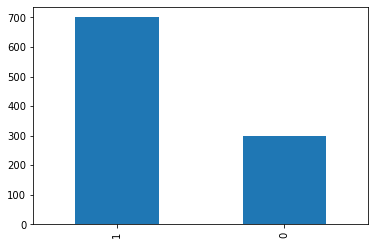

In [21]:
ax = data['RESPONSE'].value_counts().plot(kind='bar')

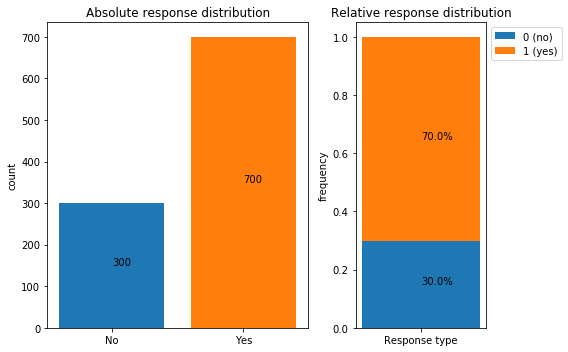

In [69]:
# plot response
keys, counts = np.unique(data.RESPONSE, return_counts=True)
counts_norm = counts/counts.sum()

fig = plt.figure(figsize=(8, 5)) #specify figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[2,1]) #specify relative size of left and right plot

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['No', 'Yes'], counts, color=['#1f77b4','#ff7f0e']) #left bar plot
ax0 = plt.title('Absolute response distribution') 
ax0 = plt.ylabel('count')
ax0 = plt.text(keys[0], counts[0]/2, counts[0]) #add text box with count of "no" cases
ax0 = plt.text(keys[1], counts[1]/2, counts[1]) #add text box with count of "yes" cases

#Normalized values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Response type'], [counts_norm[0]], label='0 (no)')
ax1 = plt.bar(['Response type'], [counts_norm[1]], bottom=counts_norm[0], label='1 (yes)')
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Relative response distribution')
ax1 = plt.ylabel('frequency')
ax1 = plt.text(['Response type'],counts_norm[0]/2, '{}%'.format((counts_norm[0]*100).round(1)))
ax1 = plt.text(['Response type'],(counts_norm[1]/2)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))

plt.tight_layout()
plt.show()

## Data preprocessing

In [3]:
data = data.drop(['OBS#'], axis=1) #axis=1 drops a column (axis=0 drops a row)

In [4]:
X=data.loc[:,data.columns!="RESPONSE"]
y=data["RESPONSE"]
X

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIOTV,EDUCATION,RETRAINING,AMOUNT,...,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN
0,0,6,4,0,0,0,1,0,0,1169,...,0,67,0,0,1,2,2,1,1,0
1,1,48,2,0,0,0,1,0,0,5951,...,0,22,0,0,1,1,2,1,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,0,49,0,0,1,1,1,2,0,0
3,0,42,2,0,0,1,0,0,0,7882,...,0,45,0,0,0,1,2,2,0,0
4,0,24,3,1,0,0,0,0,0,4870,...,1,53,0,0,0,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,0,0,1,0,0,0,1736,...,0,31,0,0,1,1,1,1,0,0
996,0,30,2,0,1,0,0,0,0,3857,...,0,40,0,0,1,1,3,1,1,0
997,3,12,2,0,0,0,1,0,0,804,...,0,38,0,0,1,1,2,1,0,0
998,0,45,2,0,0,0,1,0,0,1845,...,1,23,0,0,0,1,2,1,1,0


In [5]:
X = pd.get_dummies(X, columns=["CHK_ACCT", "HISTORY", "SAV_ACCT", "EMPLOYMENT", "PRESENT_RESIDENT","JOB"], 
                      prefix=["ACC_STATUS", "HISTORY", "SAV_ACCT", "EMPLOYMENT", "RESIDENT","JOB"]) 
X.head()

,DURATION,NEW_CAR,USED_CAR,FURNITURE,RADIOTV,EDUCATION,RETRAINING,AMOUNT,INSTALL_RATE,MALE_DIV,...,EMPLOYMENT_3,EMPLOYMENT_4,RESIDENT_1,RESIDENT_2,RESIDENT_3,RESIDENT_4,JOB_0,JOB_1,JOB_2,JOB_3
0,6,0,0,0,1,0,0,1169,4,0,...,0,1,0,0,0,1,0,0,1,0
1,48,0,0,0,1,0,0,5951,2,0,...,0,0,0,1,0,0,0,0,1,0
2,12,0,0,0,0,1,0,2096,2,0,...,1,0,0,0,1,0,0,1,0,0
3,42,0,0,1,0,0,0,7882,2,0,...,1,0,0,0,0,1,0,0,1,0
4,24,1,0,0,0,0,0,4870,3,0,...,0,0,0,0,0,1,0,0,1,0


## Data split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234) #split data 70:30

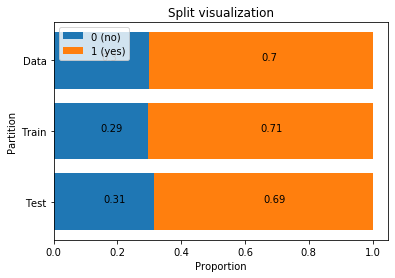

In [7]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = y.value_counts() / len(y)

fig, ax = plt.subplots()

ax.barh(['Test','Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='0 (no)')
ax.barh(['Test','Train','Data'], [test_dist[1], train_dist[1], data_dist[1]], left=[test_dist[0], train_dist[0], data_dist[0]], color='#ff7f0e', label='1 (yes)')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['Test', 'Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], [test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

## Build an (unbalanced) Decision Tree model

In [8]:
#Define Decision tree classifier with some default parameters
clf_unbalanced = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=3)

#Fit the training data 
clf_unbalanced.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [9]:
#Use classifier to predict labels
y_pred = clf_unbalanced.predict(X_test) 
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [10]:
#probabilities
y_pred_probs = clf_unbalanced.predict_proba(X_test)
y_pred_probs

array([[0.07048458, 0.92951542],
       [0.07048458, 0.92951542],
       [0.40909091, 0.59090909],
       [0.40909091, 0.59090909],
       [0.40909091, 0.59090909],
       [0.07048458, 0.92951542],
       [0.42857143, 0.57142857],
       [0.40909091, 0.59090909],
       [0.40909091, 0.59090909],
       [0.55555556, 0.44444444],
       [0.17567568, 0.82432432],
       [0.07048458, 0.92951542],
       [0.07048458, 0.92951542],
       [0.40909091, 0.59090909],
       [0.40909091, 0.59090909],
       [0.40909091, 0.59090909],
       [0.55555556, 0.44444444],
       [0.18518519, 0.81481481],
       [0.40909091, 0.59090909],
       [0.5       , 0.5       ],
       [0.40909091, 0.59090909],
       [0.17567568, 0.82432432],
       [0.40909091, 0.59090909],
       [0.55555556, 0.44444444],
       [0.40909091, 0.59090909],
       [0.55555556, 0.44444444],
       [0.07048458, 0.92951542],
       [0.07048458, 0.92951542],
       [0.5       , 0.5       ],
       [0.40909091, 0.59090909],
       [0.

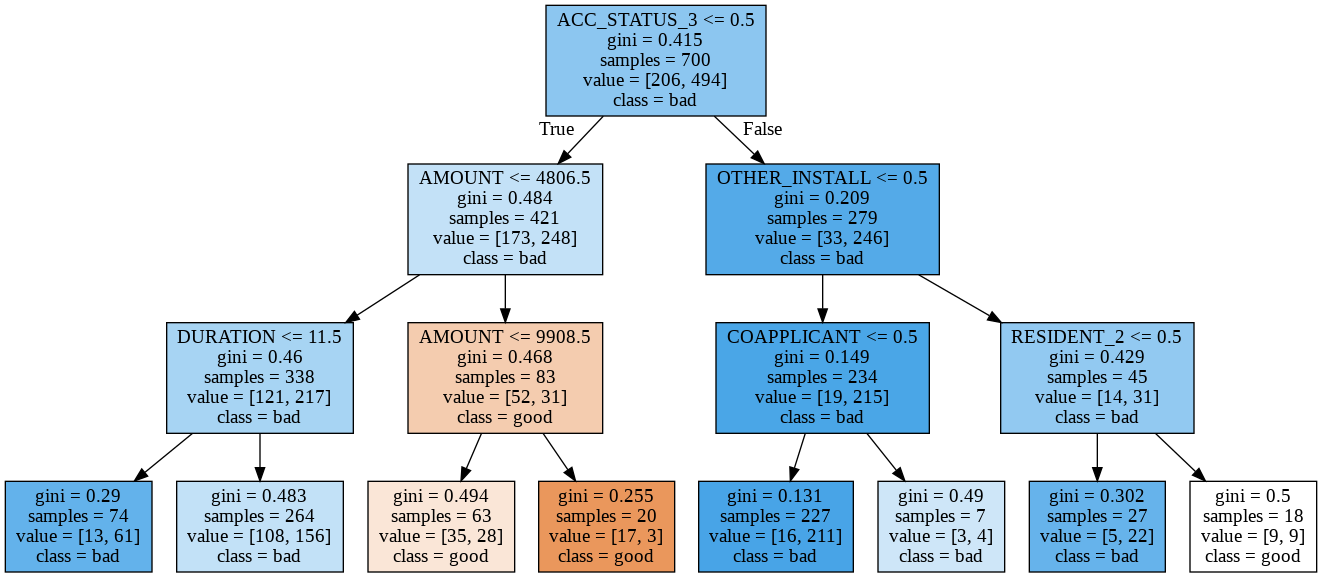

In [11]:
'''
The graphviz library is used to visualize the tree. 
'''

#Decision tree plot
import pydotplus
from IPython.display import Image 

# Create DOT data
dot_data_unbalanced = tree.export_graphviz(clf_unbalanced, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=['good', 'bad'], filled=True) #or use y_train.unique()

# Draw graph
graph_unbalanced = pydotplus.graph_from_dot_data(dot_data_unbalanced)  

# Show graph
Image(graph_unbalanced.create_png())

# Create PNG 
#graph.write_png("clf.png") #uncomment this line to save the plot as a .png file

## Rebalancing with SMOTE

In [12]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

## Build a balanced Decision Tree model

In [13]:
#Define Decision tree classifier with some default parameters
clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=3)

#Fit the training data 
clf.fit(X_sm, y_sm) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [14]:
#Use classifier to predict labels
y_pred_sm = clf.predict(X_test)
y_pred_sm

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [15]:
#probabilities
y_pred_probs_sm = clf.predict_proba(X_test)
y_pred_probs_sm

array([[0.07042254, 0.92957746],
       [0.07042254, 0.92957746],
       [0.55555556, 0.44444444],
       [0.55555556, 0.44444444],
       [0.57961783, 0.42038217],
       [0.5       , 0.5       ],
       [0.07042254, 0.92957746],
       [0.57961783, 0.42038217],
       [0.57961783, 0.42038217],
       [0.55555556, 0.44444444],
       [0.24615385, 0.75384615],
       [0.5       , 0.5       ],
       [0.38297872, 0.61702128],
       [0.57961783, 0.42038217],
       [0.57961783, 0.42038217],
       [0.57961783, 0.42038217],
       [0.57961783, 0.42038217],
       [0.38297872, 0.61702128],
       [0.55555556, 0.44444444],
       [0.07042254, 0.92957746],
       [0.57961783, 0.42038217],
       [0.24615385, 0.75384615],
       [0.57961783, 0.42038217],
       [0.57961783, 0.42038217],
       [0.57961783, 0.42038217],
       [0.57961783, 0.42038217],
       [0.38297872, 0.61702128],
       [0.        , 1.        ],
       [0.07042254, 0.92957746],
       [0.57961783, 0.42038217],
       [0.

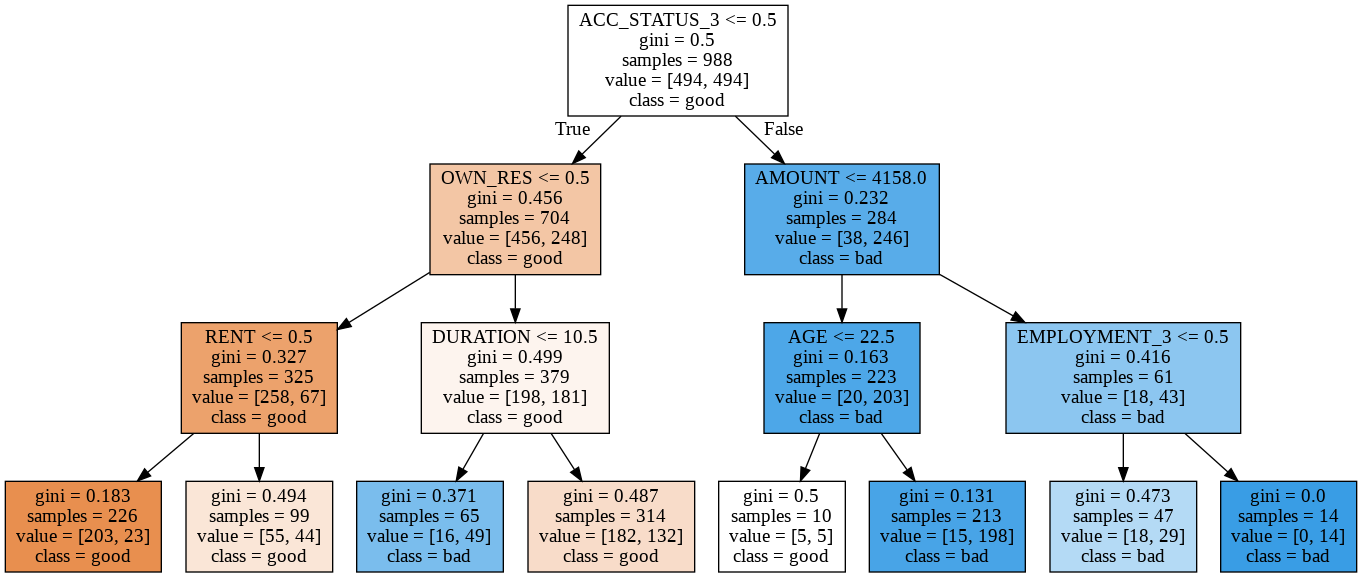

In [16]:
'''
The graphviz library is used to visualize the tree. 
'''

#Decision tree plot
import pydotplus
from IPython.display import Image 

# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=['good', 'bad'], filled=True) #or use y_train.unique()

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Create PNG 
#graph.write_png("clf.png") #uncomment this line to save the plot as a .png file

## Model evaluation

### 1. Confusion Matrix
### 2. ROC and AUC
### 3. Expected value framework (Excel)

In [21]:
print ("Accuracy of Unbalanced data is: ", (accuracy_score(y_test,y_pred)*100).round(2))

Accuracy of Unbalanced data is:  65.33


In [22]:
print ("Accuracy of SMOTE data is: ", (accuracy_score(y_test,y_pred_sm)*100).round(2))

Accuracy of SMOTE data is:  63.67


**1. Confusion Matrix**

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

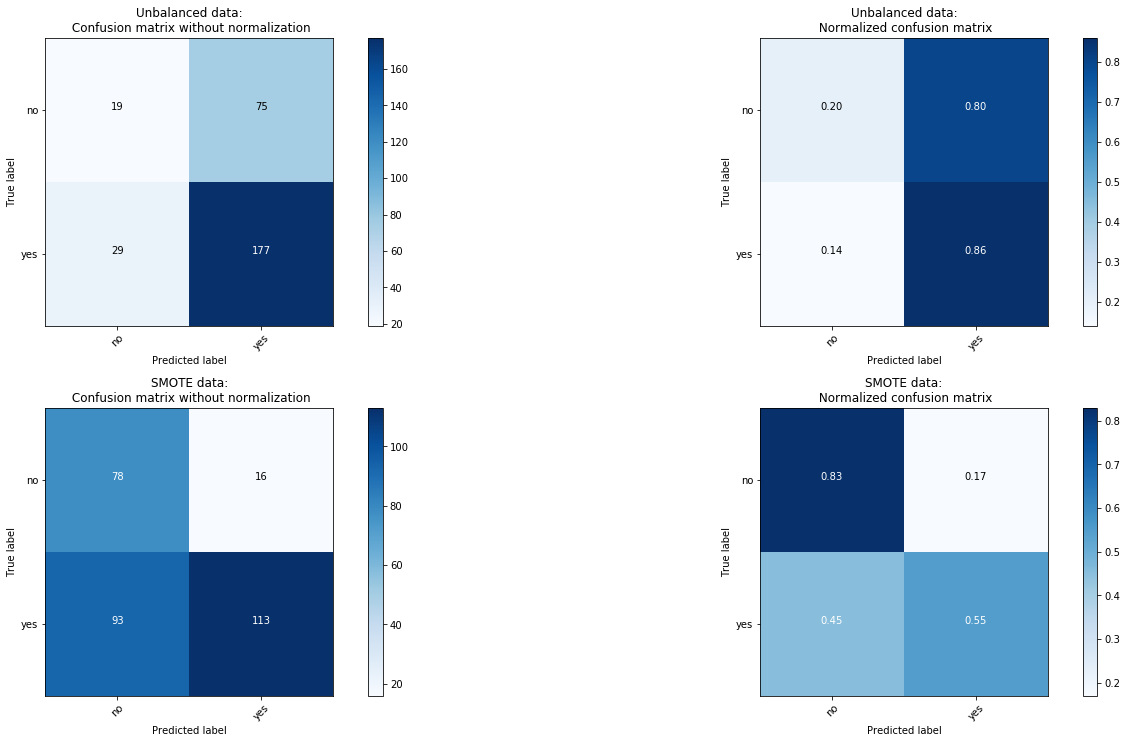

In [18]:
# Compute confusion matrix
class_names = ['no', 'yes']
cnf_matrix_unbalanced = confusion_matrix(y_test, y_pred)
cnf_matrix_sm = confusion_matrix(y_test, y_pred_sm)

np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))

#Plot Ubalanced confusion matrix
plt.subplot(321) 
plot_confusion_matrix(cnf_matrix_unbalanced, classes=class_names,
                      title='Unbalanced data:\n Confusion matrix without normalization')

#Plot Ubalanced normalized confusion matrix
plt.subplot(322) 
plot_confusion_matrix(cnf_matrix_unbalanced, classes=class_names, normalize=True,
                      title='Unbalanced data:\n Normalized confusion matrix')


#Plot SMOTE confusion matrix
plt.subplot(323) 
plot_confusion_matrix(cnf_matrix_sm, classes=class_names,
                      title='SMOTE data:\n Confusion matrix without normalization')

#Plot SMOTE normalized onfusion matrix
plt.subplot(324) 
plot_confusion_matrix(cnf_matrix_sm, classes=class_names, normalize=True,
                      title='SMOTE data:\n Normalized confusion matrix')


plt.show()

**2.ROC and AUC**

***AUC***

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])
roc_auc = auc(fpr, tpr)
print("AUC score on Unbalanced Data: " + str(roc_auc));
fpr_sm, tpr_sm, thresholds_sm = roc_curve(y_test, y_pred_probs_sm[:,1])
roc_auc_sm = auc(fpr_sm, tpr_sm)
print("AUC score on SMOTE Data: " + str(roc_auc_sm))

AUC score on Unbalanced Data: 0.6793534393720304
AUC score on SMOTE Data: 0.6938390828341252


***ROC***

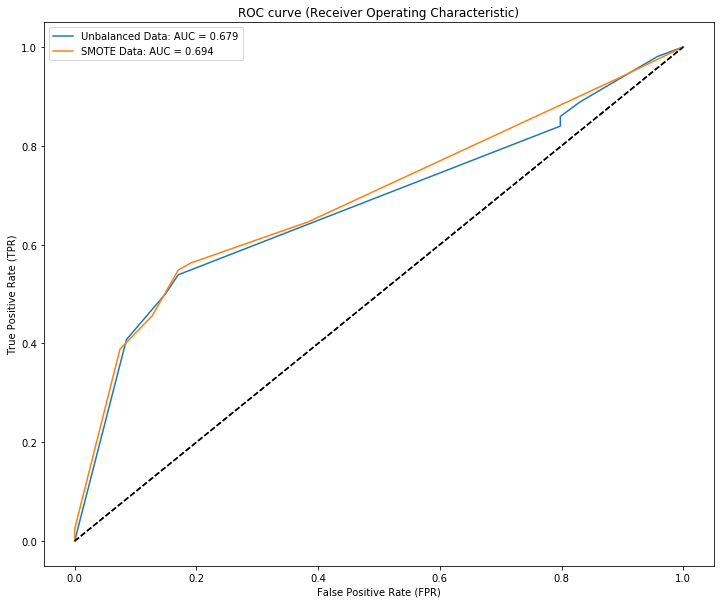

In [20]:
plt.figure(figsize=(12,10))

for test, pred, name in zip([y_test, y_test], [y_pred_probs[:,1], y_pred_probs_sm[:,1]], ['Unbalanced Data', 'SMOTE Data']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()

**Conclusion**

The model with unbalanced data correctly labels 80% of the cases as "good" credit, while only correctly labels 20% of the case as "bad". It's simply because 70% of the cases in the original data set is "good", hence the model tends to over fit to get a high accuracy score. 


The model using SMOTE data is able to identify correctly 55% of the actual "good" credit cases, and 83% of the actual "bad" credit cases. 


Based on the ROC curve and AUC score, the two models have the relatively the same performance. 


Using the Expected Benefit Value framework, we can see that with the same % of positive cases, SMOTE data clearly performs better, yielding \\$3.5 percustomer, while unbalanced data model already causes a loss of $7 per customer. 
Therefore, the SMOTE data model should be deployed. 